# 온라인 판매매체별 매출관계분석

- 국가통계포털 https://kosis.kr
- 온라인 쇼핑몰 판매매체별 / 상품군별거래액
- 합계등은 제외하고 선택

In [11]:
 !pip install prophet

     |████████████████████████████████| 8.2 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 6.0 MB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 158.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/jin/.pyenv/versions/3.9.10/bin/python3.9 -m pip install --upgrade pip' command.


In [26]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

import pandas as pd
import numpy as np

from datetime import datetime
from prophet import Prophet
import warnings
import logging

In [27]:
# 차트 스타일
plt.style.use('fivethirtyeight')

# 폰트 설정
d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams["font.family"] = 'D2Coding'

# 마이너스 부호가 깨지지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [28]:
file_path = './data_set/온라인쇼핑몰_판매매체별_상품군별거래액_20241128145607.csv'
data = pd.read_csv(file_path, encoding='EUC-KR')
data.columns = ['category','date','internet_shopping','mobile_shopping']
data.tail()

,category,date,internet_shopping,mobile_shopping
2134,기타,2024.05,71448,134369
2135,기타,2024.06,63577,115554
2136,기타,2024.07,71215,115314
2137,기타,2024.08 p),60136,120213
2138,기타,2024.09 p),64122,126958


In [15]:
print('수정전')
print(data['date'].tail())
data["date"] = data["date"].map(lambda x: x.rstrip(' p)'))
print('수정후')
print(data['date'].tail())

수정전
2134       2024.05
2135       2024.06
2136       2024.07
2137    2024.08 p)
2138    2024.09 p)
Name: date, dtype: object
수정후
2134    2024.05
2135    2024.06
2136    2024.07
2137    2024.08
2138    2024.09
Name: date, dtype: object


In [16]:
data['date'] = pd.to_datetime(data['date'] , format='%Y.%m')
data.sample(17)

,category,date,internet_shopping,mobile_shopping
99,가전·전자·통신기기,2017-07-01,432760,494107
166,가전·전자·통신기기,2023-02-01,551798,1207891
682,패션용품 및 액세서리,2019-08-01,65641,146760
1928,음식서비스,2022-09-01,36595,1963891
1578,애완용품,2024-07-01,38278,190612
1331,자동차 및 자동차용품,2019-06-01,39230,59477
1505,애완용품,2018-06-01,23474,51652
1946,음식서비스,2024-03-01,33851,2244521
2123,기타,2023-06-01,82435,142982
586,가방,2019-05-01,55623,169509


In [10]:
ex1_data = data.copy()
obj = ['컴퓨터 및 주변기기','음식서비스','음·식료품','여행 및 교통서비스','패션용품 및 액세서리']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(10)

,category,date,internet_shopping,mobile_shopping
91,컴퓨터 및 주변기기,2024.08,267476,319806
82,컴퓨터 및 주변기기,2023.11,373633,384270
1627,여행 및 교통서비스,2020.11,149213,535226
1882,음식서비스,2018.11,42091,468405
1666,여행 및 교통서비스,2024.02,696352,1452625
67,컴퓨터 및 주변기기,2022.08,357832,368174
700,패션용품 및 액세서리,2021.02,53788,168729
1646,여행 및 교통서비스,2022.06,470423,1039451
51,컴퓨터 및 주변기기,2021.04,385886,346865
731,패션용품 및 액세서리,2023.09,69507,215380


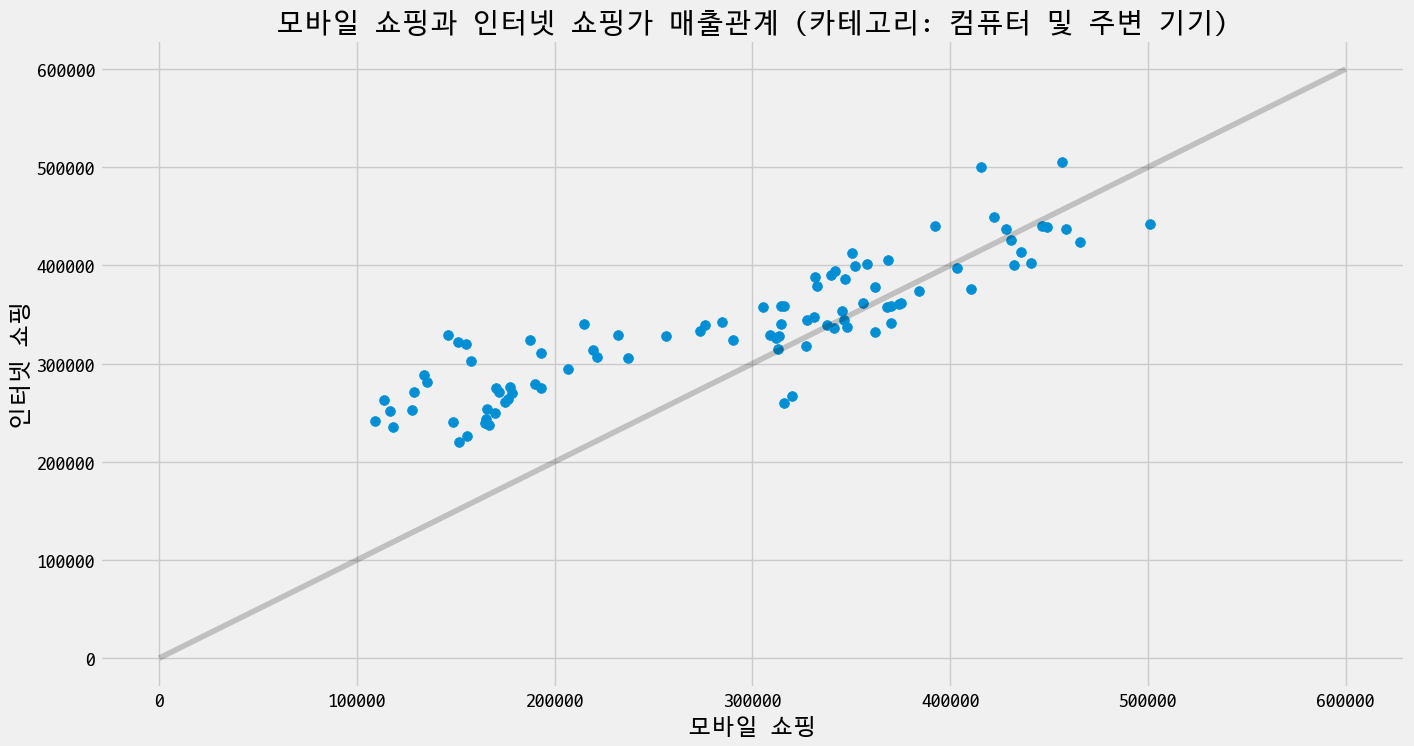

In [25]:
x_data = ex2_data['mobile_shopping']
y_data = ex2_data['internet_shopping']
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(x_data, y_data, s=50)
ax.set_title("모바일 쇼핑과 인터넷 쇼핑가 매출관계 (카테고리: 컴퓨터 및 주변 기기)")
ax.set_xlabel("모바일 쇼핑")
ax.set_ylabel("인터넷 쇼핑")
ax.plot([0,600000], [0,600000], 'k-',alpha=0.2)